### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating pandas dataframe for different dataset 

In [2]:
# Creating pandas dataframe for all dataset
horseassess = pd.read_csv('horseasses-population-in-nepal-by-district.csv')
milkproduction = pd.read_csv('milk-animals-and-milk-production-in-nepal-by-district.csv')
meatproduction = pd.read_csv('net-meat-production-in-nepal-by-district.csv')
cottonproduction = pd.read_csv('production-of-cotton-in-nepal-by-district.csv')
eggproduction = pd.read_csv('production-of-egg-in-nepal-by-district.csv')
rabbitpopulation = pd.read_csv('rabbit-population-in-nepal-by-district.csv')
woolproduction = pd.read_csv('wool-production-in-nepal-by-district.csv')
yakchauripopulation = pd.read_csv('yak-nak-chauri-population-in-nepal-by-district.csv')

# Performing necessary cleaning and merging

## Verifying if the given total in dataset is correct or not 

In [3]:
'''Changing column name to calculate original total'''
horseassess.rename(columns={'Horses/Asses':'Horses_Asses'}, inplace = True) # renaming horseassess column Horses/Asses into Horses_Asses

In [4]:
horseassess.tail()

,DISTRICT,Horses_Asses
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811
59,Total,55808


## Confirming that the total value given is not correct 

In [5]:
total_horses_asses = horseassess.Horses_Asses.sum() # finds out the sum of values of Horses_asses
total_horses_asses

167424

In [6]:
"""Removing total because the actual total is not correct compared with the dataset."""

horseassess.drop(labels=59, axis=0, inplace = True) # dropping the total value from horseassess for further analysis
horseassess.tail()

,DISTRICT,Horses_Asses
54,ACHHAM,95
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811


# Performing Necessary Cleaning and Merging

## Creating function to find different district in  two dataframe to perform Merge 

In [7]:
"""Function to find out the different district name in two dataframes"""

def find_difference(list1, list2):
    list_difference = [] # stores the differences
    for item in list1:
        if item not in list2:
            list_difference.append(item) #appends the different values found
    return list_difference

In [8]:
"""Creating list of districts to use it in above function."""

horse_district = list(horseassess.DISTRICT) # df converted in list to find out the list of districts
milk_district = list(milkproduction.DISTRICT) # df converted in list to find out the list of districts

In [9]:
"""Using above function to find different value in both the list"""

find_difference(horse_district, milk_district)

['TERATHUM', 'E.REGION', 'C.REGION', 'W.REGION', 'MW.REGION', 'FW.REGION']

## Transforming the value in both horseassess and milkproduction to make it equal for merge 

In [10]:
"""Transforming above different district in to same spelling"""

milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['E. REGION'],'E.REGION')
milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['C. REGION'],'C.REGION')
milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['W. REGION'],'W.REGION')
milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['MW. REGION'],'MW.REGION')
milkproduction['DISTRICT'] = milkproduction['DISTRICT'].replace(['FW. REGION'],'FW.REGION')

## Merging horseassess and milkproduction and create new dataframe df1

In [11]:
df1 = pd.merge(horseassess, milkproduction, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df1.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0


## Finding Difference between df1 and meatproduction before merging

In [12]:
"""Using find_difference function to find difference between two dataframes"""

differ_horseassess = list(df1['DISTRICT'])
differ_milkproduction = list(meatproduction['DISTRICT'])
find_difference(differ_horseassess, differ_milkproduction)

['SANKHUWASHAVA', 'TERATHUM']

## Renaming necessary district name 

In [13]:
"""Renaming different district name to merge"""

meatproduction['DISTRICT'] = meatproduction['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
meatproduction['DISTRICT'] = meatproduction['DISTRICT'].replace(['SANKHUWASABHA'],'SANKHUWASHAVA')

## Merging DF1 and meatproduction 

In [14]:
df2 = pd.merge(df1, meatproduction, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df2.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365


## Finding diffrence between DF2 and cottonproduction

In [15]:
"""Using find_difference function to find difference between two dataframes"""

differ_meatproduction = list(df2['DISTRICT'])
differ_cottonproduction = list(cottonproduction['DISTRICT'])
find_difference(differ_cottonproduction, differ_meatproduction)

['Dang', 'Banke', 'Bardiya']

In [16]:
"""Renaming different district name to merge"""

cottonproduction['DISTRICT'] = cottonproduction['DISTRICT'].replace(['Dang'],'DANG')
cottonproduction['DISTRICT'] = cottonproduction['DISTRICT'].replace(['Banke'],'BANKE')
cottonproduction['DISTRICT'] = cottonproduction['DISTRICT'].replace(['Bardiya'],'BARDIYA')

## Merging DF2 and cottonproduction to create DF3

In [17]:
df3 = pd.merge(df2, cottonproduction, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df3.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,NaN,NaN,NaN
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,NaN,NaN,NaN
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,NaN,NaN,NaN
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,NaN,NaN,NaN
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,NaN,NaN,NaN


## Finding difference between DF3 and eggproduction

In [18]:
"""Using find_difference function to find difference between two dataframes"""

differ_eggproduction = list(df3['DISTRICT'])
differ_rabbitpopulation = list(eggproduction['DISTRICT'])
find_difference(differ_eggproduction, differ_rabbitpopulation)

['TERATHUM']

In [19]:
"""Renaming different district name to merge"""

eggproduction['DISTRICT'] = eggproduction['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')

## Merging DF3 and eggproduction

In [20]:
df4 = pd.merge(df3, eggproduction, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df4.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,0,1744,NaN,NaN,NaN,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,1,3457,NaN,NaN,NaN,77512.0,465,5506,34,5540
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,0,2161,NaN,NaN,NaN,42671.0,374,2345,28,2373
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,1,3419,NaN,NaN,NaN,63779.0,261,5581,19,5600
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,0,3365,NaN,NaN,NaN,26781.0,332,6656,27,6683


## Finding difference in DF4 and rabbitpopulation

In [21]:
"""Using find_difference function to find difference between two dataframes"""

differ_woolproduction = list(df4['DISTRICT'])
differ_yakchauripopulation = list(rabbitpopulation['DISTRICT'])
find_difference(differ_yakchauripopulation, differ_woolproduction)

['TERHATHUM', 'RAMECHHAP', 'Total']

In [22]:
"""Removing total because the actual total is not correct compared with the dataset."""

rabbitpopulation.drop(labels=54, axis=0, inplace = True) # dropping the total value from horseassess for further analysis
rabbitpopulation.head()

,DISTRICT,Rabbit
0,TAPLEJUNG,506
1,SANKHUWASHAVA,313
2,SOLUKHUMBU,105
3,PANCHTHAR,29
4,ILLAM,240


In [23]:
"""Renaming different district name to merge"""

rabbitpopulation['DISTRICT'] = rabbitpopulation['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
rabbitpopulation['DISTRICT'] = rabbitpopulation['DISTRICT'].replace(['RAMECHHAP'],'RAMECHAP')

## Merging DF4 and rabbitpopulation to create DF5

In [24]:
df5 = pd.merge(df4, rabbitpopulation, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df5.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,1744,NaN,NaN,NaN,15366.0,341,2420,25,2445,506.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,3457,NaN,NaN,NaN,77512.0,465,5506,34,5540,313.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,2161,NaN,NaN,NaN,42671.0,374,2345,28,2373,105.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,3419,NaN,NaN,NaN,63779.0,261,5581,19,5600,29.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,3365,NaN,NaN,NaN,26781.0,332,6656,27,6683,240.0


## Finding difference in DF5 and woolproduction

In [25]:
"""Using find_difference function to find difference between two dataframes"""

differ_df9 = list(df5['DISTRICT'])
differ_horseassess0 = list(woolproduction['DISTRICT'])
find_difference(differ_horseassess0, differ_df9)

['TERHATHUM']

In [26]:
"""Renaming different district name to merge"""

woolproduction['DISTRICT'] = woolproduction['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')

## Merging DF5 and woolproduction to create new DF6

In [27]:
df6 = pd.merge(df5, woolproduction, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df6.head()

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,NaN,NaN,15366.0,341,2420,25,2445,506.0,5777,3519
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,NaN,NaN,77512.0,465,5506,34,5540,313.0,12181,9050
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,NaN,NaN,42671.0,374,2345,28,2373,105.0,8461,6286
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,NaN,NaN,63779.0,261,5581,19,5600,29.0,1338,994
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,NaN,NaN,26781.0,332,6656,27,6683,240.0,160,118


## Finding difference between DF6 and yakchauriproduction

In [28]:
"""Using find_difference function to find difference between two dataframes"""

differ_horseassess1 = list(df6['DISTRICT'])
differ_horseassess2 = list(yakchauripopulation['DISTRICT'])
find_difference(differ_horseassess2, differ_horseassess1)

['Total']

In [29]:
"""Removing total because the actual total is not correct compared with the dataset."""

yakchauripopulation.drop(labels=34, axis=0, inplace = True) # dropping the total value from horseassess for further analysis
yakchauripopulation.head()

,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165


## Merging DF6 and yakchauripopulation which will create final Dataframe

In [30]:
df7 = pd.merge(df6, yakchauripopulation, on="DISTRICT", how='outer') # merges horseassess and milkproduction and creates new dataframe df9
df7

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,NaN,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,NaN,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,NaN,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,NaN,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,NaN,26781.0,332,6656,27,6683,240.0,160,118,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,...,NaN,48735.0,535,7717,39,7756,NaN,4366,3350,NaN
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,...,NaN,277409.3,3418,16928,275,17203,NaN,21267,15801,NaN
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,...,NaN,186108.0,1932,13483,155,13638,NaN,7953,5909,NaN
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,...,NaN,463517.8,5350,30411,430,30841,NaN,29220,21710,NaN


# 3) Exploratory Data Analysis

## 1) Milk production Analysis

In [31]:
# Extracting and creating dataframe of five different regions
datahorse= df7[df7['DISTRICT'].str.startswith(("FW.","MW.","W.","E.","C."))]
datahorse

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0
59,E.MOUNTAIN,NaN,31284,31855,15324,20339,35663.0,3376,100,1865,...,NaN,135548.00,1180,10271,87,10358,NaN,26419,18855,NaN
61,E.HILLS,NaN,123976,109431,74587,95837,170424.0,15440,146,5484,...,NaN,549366.00,5916,78878,458,79336,NaN,46238,33361,NaN
64,E.TERAI,NaN,177124,150892,106797,147023,253820.0,22404,23,8380,...,NaN,1095640.00,53097,125092,4167,129259,NaN,7158,5786,NaN
68,C.MOUNTAIN,NaN,21380,32607,13173,30261,43434.0,4486,85,1821,...,NaN,232271.00,3423,16482,265,16747,NaN,25100,18649,NaN
77,C.HILLS,NaN,125519,187803,78958,187149,266107.0,23305,147,6777,...,NaN,3222902.00,17417,276415,1338,277753,NaN,44251,32874,NaN


In [32]:
# setting index for all filtered data to perform analysis
set_index= datahorse.set_index("DISTRICT", drop = False)

<AxesSubplot:xlabel='DISTRICT'>

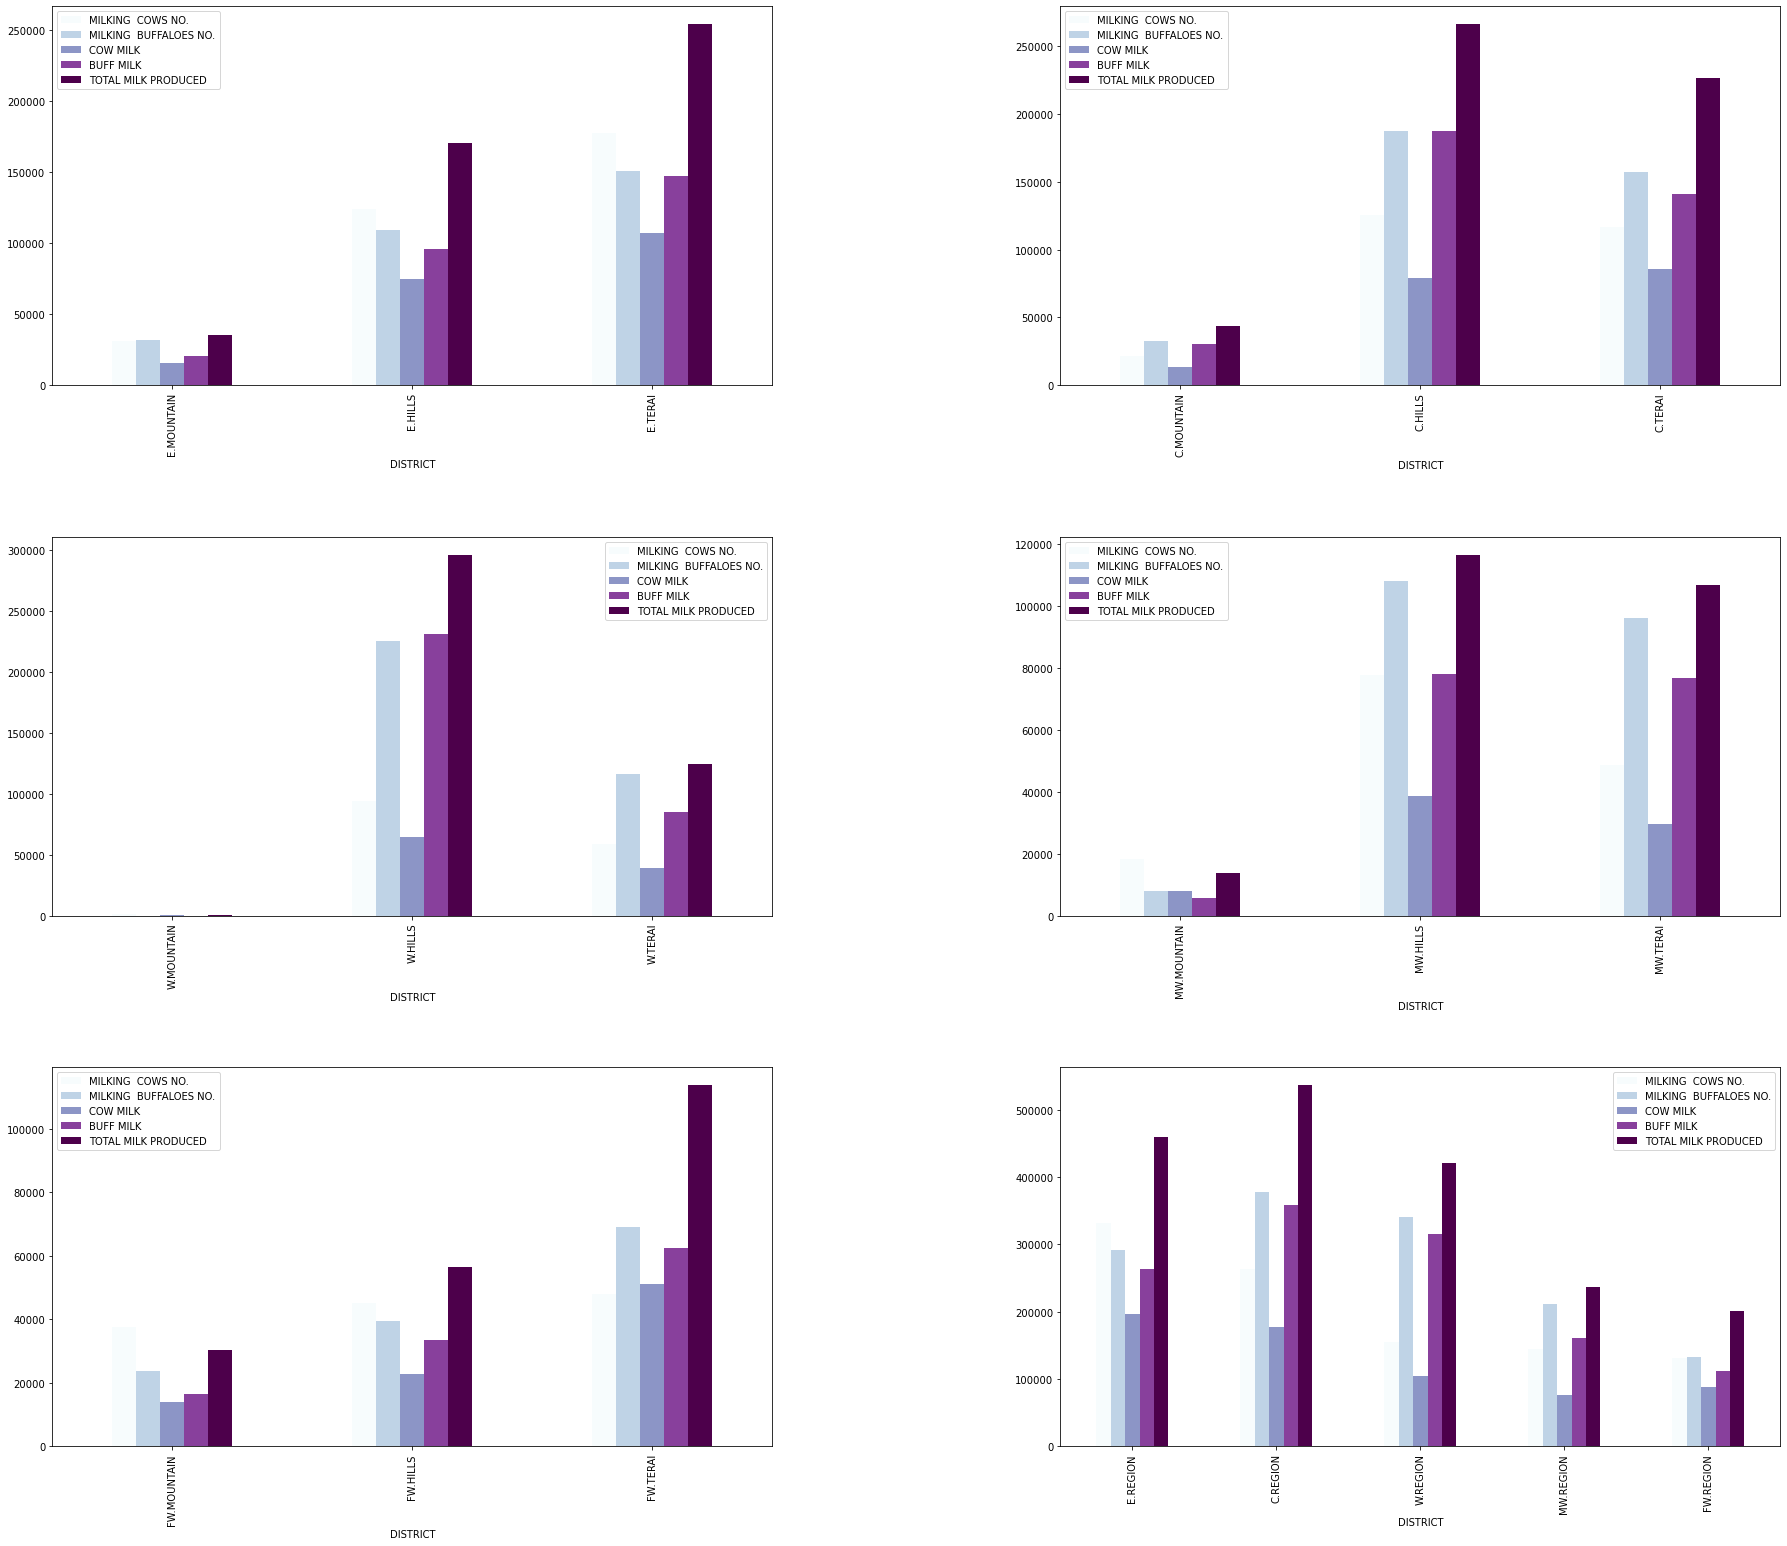

In [33]:
#Bar plots to visualize the milk production in different mountain, hills, terai
size=(30,25)
f, axes = plt.subplots(3,2)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
set_index.iloc[5:8,2:7].plot.bar(figsize = size,ax=axes[0][0],cmap = "BuPu")
set_index.iloc[8:11,2:7].plot.bar(figsize = size, ax=axes[0][1],cmap = "BuPu")
set_index.iloc[11:14,2:7].plot.bar(figsize = size, ax=axes[1][0],cmap = "BuPu")
set_index.iloc[14:17,2:7].plot.bar(figsize = size, ax=axes[1][1],cmap = "BuPu")
set_index.iloc[17:20,2:7].plot.bar(figsize = size, ax=axes[2][0],cmap = "BuPu")
set_index.iloc[0:5,2:7].plot.bar(figsize = size, ax=axes[2][1],cmap = "BuPu")

## 2) Duck Egg Analysis

In [34]:
# Extracting and creating dataframe of five different regions
duck_num= df7[df7['DISTRICT'].str.startswith(("FW.","MW.","W.","E.","C."))]
duck_num

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0
59,E.MOUNTAIN,NaN,31284,31855,15324,20339,35663.0,3376,100,1865,...,NaN,135548.00,1180,10271,87,10358,NaN,26419,18855,NaN
61,E.HILLS,NaN,123976,109431,74587,95837,170424.0,15440,146,5484,...,NaN,549366.00,5916,78878,458,79336,NaN,46238,33361,NaN
64,E.TERAI,NaN,177124,150892,106797,147023,253820.0,22404,23,8380,...,NaN,1095640.00,53097,125092,4167,129259,NaN,7158,5786,NaN
68,C.MOUNTAIN,NaN,21380,32607,13173,30261,43434.0,4486,85,1821,...,NaN,232271.00,3423,16482,265,16747,NaN,25100,18649,NaN
77,C.HILLS,NaN,125519,187803,78958,187149,266107.0,23305,147,6777,...,NaN,3222902.00,17417,276415,1338,277753,NaN,44251,32874,NaN


Text(0.5, 0, 'Development Region')

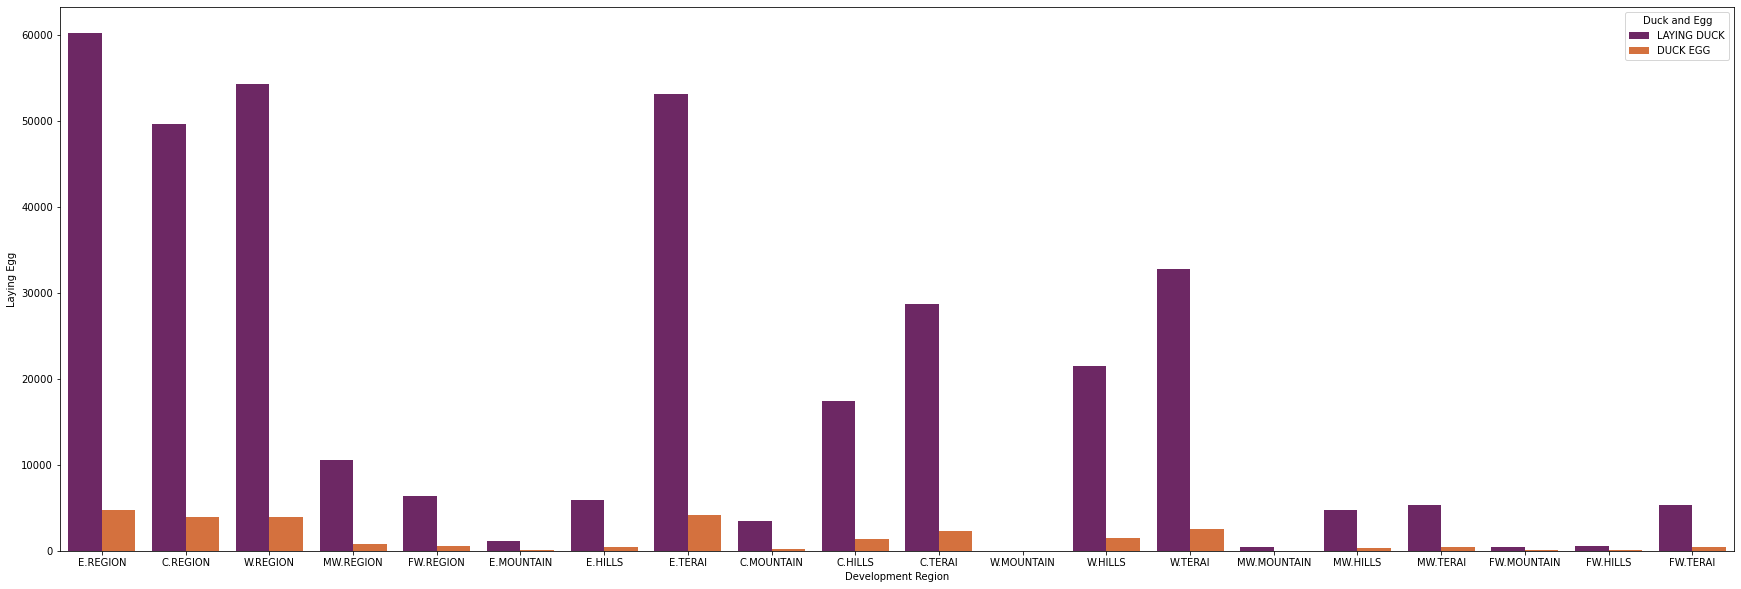

In [35]:
#Total duck egg production in different hill, mountains, terai regions in Nepal
duck_egg_production = duck_num[['DISTRICT','LAYING DUCK','DUCK EGG']]

#Reshaping
duck_reshape= pd.melt(duck_egg_production, id_vars="DISTRICT",value_name="Laying Egg",var_name="Duck and Egg")
plt.figure(figsize=(30,10))

#barplot to visualize the data
sns.barplot(x="DISTRICT", y="Laying Egg", data= duck_reshape, hue="Duck and Egg", palette="inferno")
plt.xlabel('Development Region')

## 3) Meat Production Analysis

In [36]:
meat_prod= df7[df7['DISTRICT'].str.endswith(("REGION"))]
meat_prod

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


Text(0.5, 0, 'Development Region')

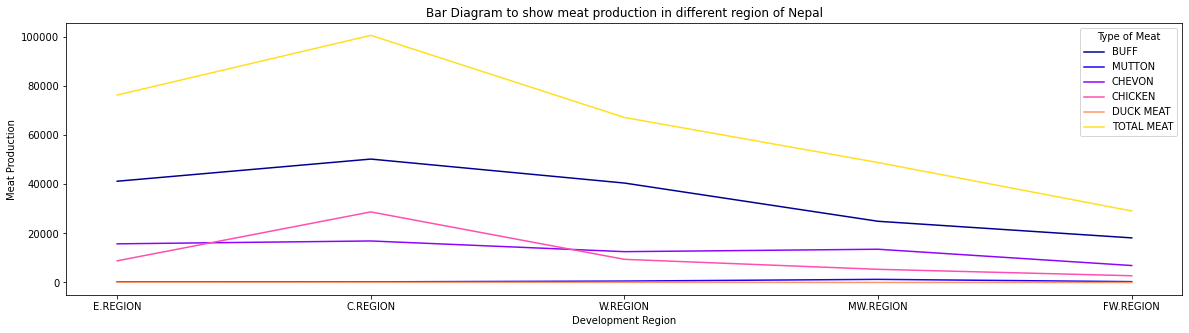

In [37]:
#Total meat production in different Development Region of Nepal
meat_production = meat_prod[['DISTRICT','BUFF','MUTTON','CHEVON','CHICKEN','DUCK MEAT','TOTAL MEAT']]

#Reshaping
meat_reshape= pd.melt(meat_production, id_vars="DISTRICT",value_name="Meat Production",var_name="Type of Meat")
plt.figure(figsize=(20,5))

#barplot to visualize the data
sns.lineplot(x="DISTRICT", y="Meat Production", data= meat_reshape, hue="Type of Meat", palette="gnuplot2")
plt.title('Bar Diagram to show meat production in different region of Nepal')
plt.xlabel('Development Region')

## 4) Wool Production Analysis

In [38]:
# Extracting data based on five different regions 
wool_prod= df7[df7['DISTRICT'].str.endswith(("REGION"))]
wool_prod

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


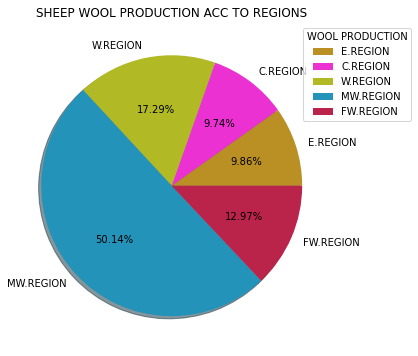

In [39]:
# Pie chart representing wool production in 5 different regions of Nepal
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(wool_prod['SHEEP WOOL PRODUCED'],
        labels = wool_prod['DISTRICT'],
        colors = ["#BA8F24", "#EC31D2","#B1BA24","#2493BA","#BA244B"], autopct = "%.2f%%",radius = 1,shadow=True)
plt.title("SHEEP WOOL PRODUCTION ACC TO REGIONS", fontsize=12)
ax.legend(title="WOOL PRODUCTION",bbox_to_anchor =(1.25,1))

## 5) Cotton Production Analysis

In [40]:
# Extracting cotton data of only three districts
cotton_prod= df7[df7['DISTRICT'].str.startswith(("DANG","BANKE","BARDIYA"))]
cotton_prod

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
47,DANG,317.0,18630,31882,9984,18043,28027.0,3507,115,3352,...,700.0,411349.0,3223,54787,260,55047,NaN,34091,25329,NaN
48,BANKE,3963.0,14060,36201,8956,31062,40018.0,3256,42,1652,...,1519.0,194508.0,858,13063,65,13128,NaN,11609,8625,NaN
49,BARDIYA,559.0,15932,27931,10792,27784,38576.0,3405,35,1758,...,1200.0,123536.0,1214,15457,92,15549,NaN,13025,9677,NaN


Text(0.5, 0, 'District')

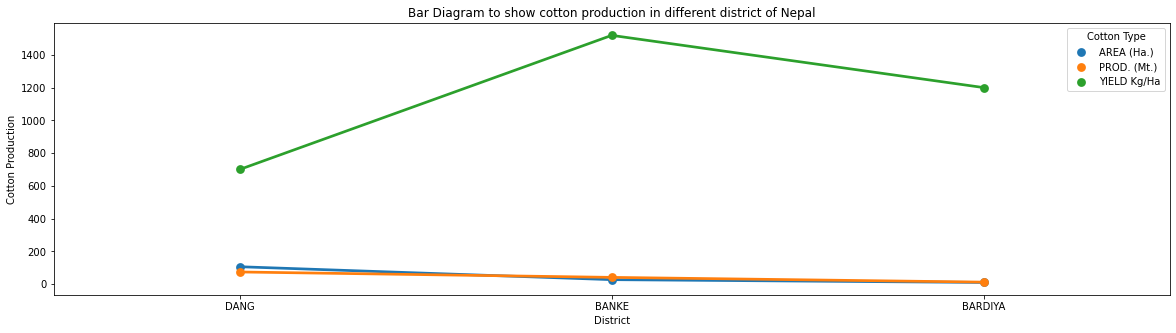

In [41]:
#Total cotton production in three district of Nepal
cotton_production = cotton_prod[['DISTRICT','AREA (Ha.)','PROD. (Mt.)','YIELD Kg/Ha']]

#Reshaping
cotton_reshape= pd.melt(cotton_production, id_vars="DISTRICT",value_name="Cotton Production",var_name="Cotton Type")
plt.figure(figsize=(20,5))
#plot the point plot
sns.pointplot(x="DISTRICT", y="Cotton Production", data= cotton_reshape, hue="Cotton Type")
plt.title('Bar Diagram to show cotton production in different district of Nepal')
plt.xlabel('District')

## 6) HorseAsses Analysis based on regions

In [42]:
# Extracting horseasses data of different regions 
horse_num= df7[df7['DISTRICT'].str.endswith(("REGION", "HILLS","MOUNTAIN","TERAI"))]
horse_num

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0
59,E.MOUNTAIN,NaN,31284,31855,15324,20339,35663.0,3376,100,1865,...,NaN,135548.00,1180,10271,87,10358,NaN,26419,18855,NaN
61,E.HILLS,NaN,123976,109431,74587,95837,170424.0,15440,146,5484,...,NaN,549366.00,5916,78878,458,79336,NaN,46238,33361,NaN
64,E.TERAI,NaN,177124,150892,106797,147023,253820.0,22404,23,8380,...,NaN,1095640.00,53097,125092,4167,129259,NaN,7158,5786,NaN
68,C.MOUNTAIN,NaN,21380,32607,13173,30261,43434.0,4486,85,1821,...,NaN,232271.00,3423,16482,265,16747,NaN,25100,18649,NaN
77,C.HILLS,NaN,125519,187803,78958,187149,266107.0,23305,147,6777,...,NaN,3222902.00,17417,276415,1338,277753,NaN,44251,32874,NaN


Text(0.5, 0, 'Development Region')

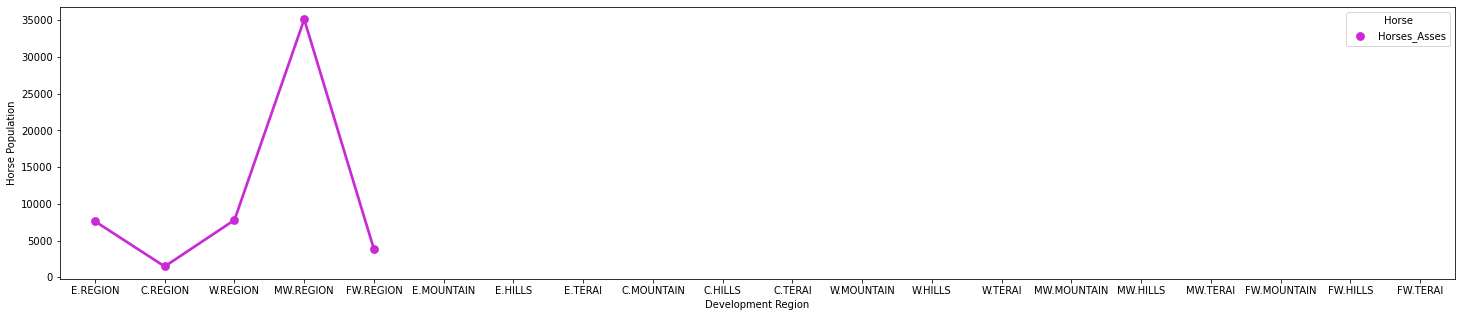

In [43]:
#Total horse production in different Development Region in Nepal
horse_numbers = horse_num[['DISTRICT','Horses_Asses']]

#Reshaping
horse_reshape= pd.melt(horse_numbers, id_vars="DISTRICT",value_name="Horse Population",var_name="Horse")
plt.figure(figsize=(25,5))

#histplot to visualize the data
sns.pointplot(x="DISTRICT", y="Horse Population", data= horse_reshape, hue="Horse", palette="gnuplot2")
plt.xlabel('Development Region')

## 7) Heatmap Of Total productions in different Districts

Text(69.0, 0.5, 'Production Items')

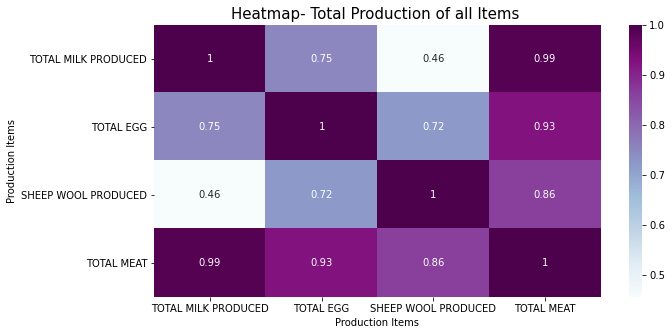

In [44]:
#correlation between the different production items
coffe= df7[['TOTAL MILK PRODUCED','TOTAL EGG','SHEEP WOOL PRODUCED','TOTAL MEAT']].corr()
plt.figure(figsize=(10,5))

#plot the heatmap
sns.heatmap(coffe,annot =True,cmap="BuPu")
plt.title('Heatmap- Total Production of all Items ',fontsize=15)
plt.xlabel('Production Items',fontsize=10)
plt.ylabel('Production Items',fontsize=10)

## 8) YAK/NAK/CHAURI Population Analysis

In [45]:
# Extracting yak/nak/chauri data of different regions
yak_num= df7[df7['DISTRICT'].str.endswith(("REGION", "HILLS","MOUNTAIN","TERAI"))]
yak_num

,DISTRICT,Horses_Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,...,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,...,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,...,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,...,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,...,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0
59,E.MOUNTAIN,NaN,31284,31855,15324,20339,35663.0,3376,100,1865,...,NaN,135548.00,1180,10271,87,10358,NaN,26419,18855,NaN
61,E.HILLS,NaN,123976,109431,74587,95837,170424.0,15440,146,5484,...,NaN,549366.00,5916,78878,458,79336,NaN,46238,33361,NaN
64,E.TERAI,NaN,177124,150892,106797,147023,253820.0,22404,23,8380,...,NaN,1095640.00,53097,125092,4167,129259,NaN,7158,5786,NaN
68,C.MOUNTAIN,NaN,21380,32607,13173,30261,43434.0,4486,85,1821,...,NaN,232271.00,3423,16482,265,16747,NaN,25100,18649,NaN
77,C.HILLS,NaN,125519,187803,78958,187149,266107.0,23305,147,6777,...,NaN,3222902.00,17417,276415,1338,277753,NaN,44251,32874,NaN


Text(0.5, 0, 'Development Region')

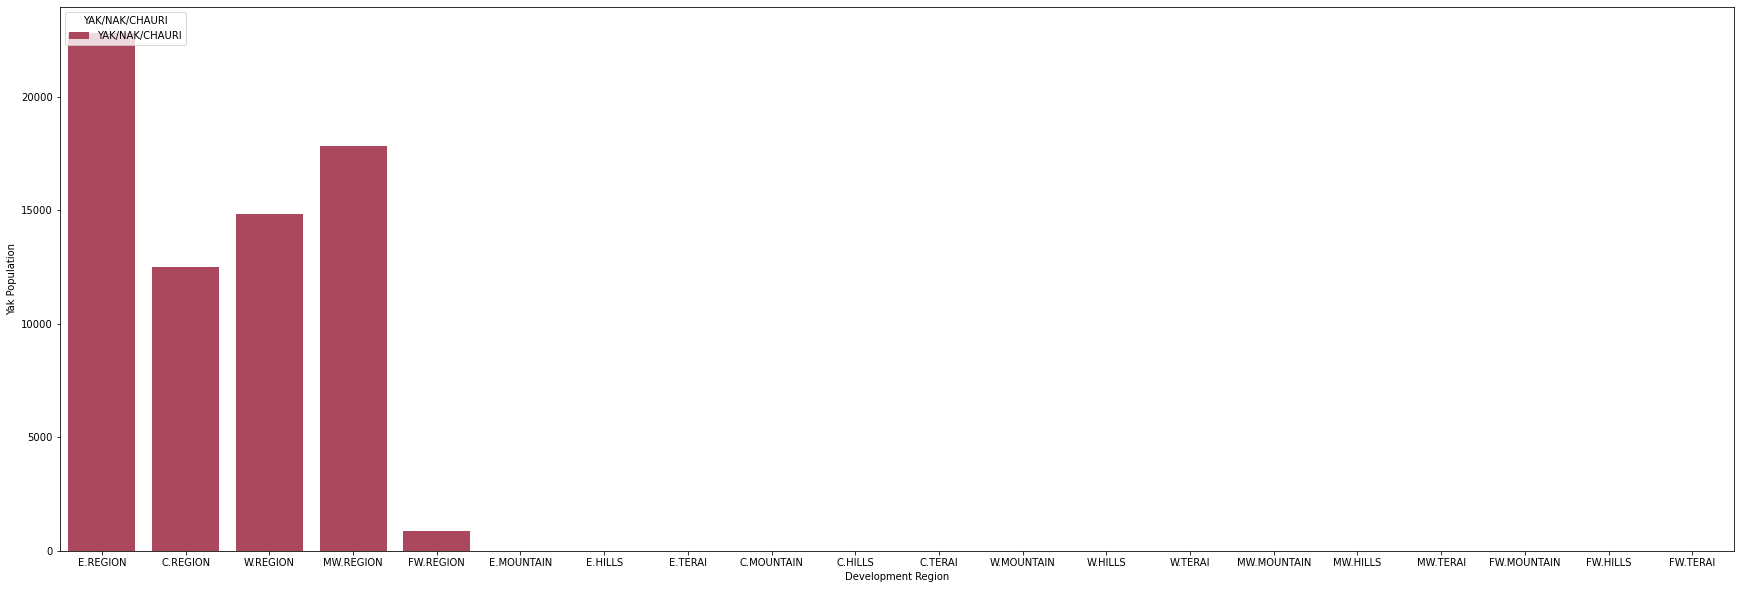

In [46]:
#Total Yak/Nak/Chauri population in different region in Nepal
yak_population = yak_num[['DISTRICT','YAK/NAK/CHAURI']]

#Reshaping
yak_reshape= pd.melt(yak_population, id_vars="DISTRICT",value_name="Yak Population",var_name="YAK/NAK/CHAURI")
plt.figure(figsize=(30,10))

#barplot to visualize the above data
sns.barplot(x="DISTRICT", y="Yak Population", data= yak_reshape, hue="YAK/NAK/CHAURI", palette="inferno")
plt.xlabel('Development Region')